In [2]:
import scanpy as sc
import os, torch
import numpy as np
import pandas as pd
import pickle as pkl
import scipy.sparse as sp
from collections import namedtuple
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


In [7]:
cd

/home/jupyter


In [8]:
from TrainFunction import plot_cormap, scatter_Plot, correlationScores

Gastrulation

In [4]:
gastrulation=sc.read_h5ad('/home/jupyter/mount/gdrive/TrainedModels/trainedBGPLVM_Gastrulation.h5ad')

In [5]:
gastrulation

AnnData object with n_obs × n_vars = 89267 × 1488
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom', 'cellcycle_pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'likelihood_state_dict', 'model_state_dict', 'pca'
    obsm: 'X_BGPLVM_latent', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'

In [85]:
gastrulation.uns['covar_module.base_kernel.kernels.1.raw_lengthscale']

KeyError: 'covar_module.base_kernel.kernels.1.raw_lengthscale'

| Dataset     | Gastrulation|
| ----------- | ----------- |
| No of Cells | 89267        |
| No of Genes | 1488       |
|X_Init       | PCs         |
|Time         | 9:25        |

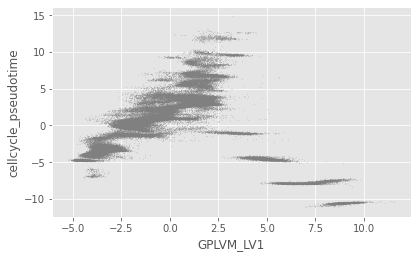

In [21]:
scatter_Plot(gastrulation) #sanity check

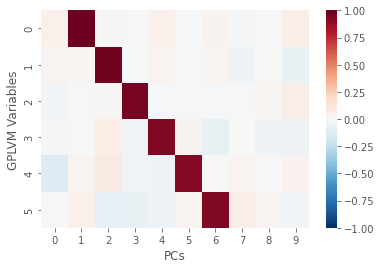

In [66]:
plot_cormap(gastrulation,10) 

| Dataset     | Gastrulation|
| ----------- | ----------- |
| No of Cells | 89267        |
| No of Genes | 1488       |
|X_Init       | random        |
|Time         | 9:25        |

In [17]:
gastrulation_randomInit=sc.read_h5ad('/home/jupyter/mount/gdrive/TrainedModels/trainedBGPLVM_Gastrulation_randomInit.h5ad')

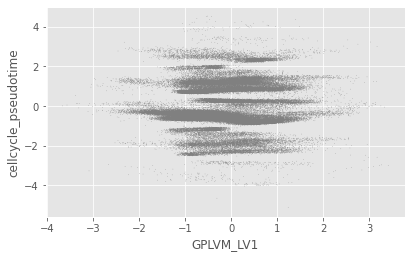

In [18]:
scatter_Plot(gastrulation_randomInit) #sanity check

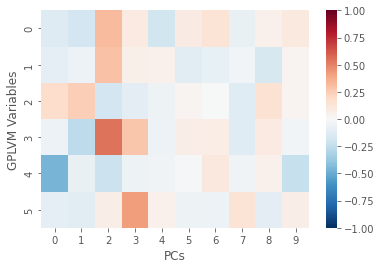

In [11]:
plot_cormap(gastrulation_randomInit, 10)

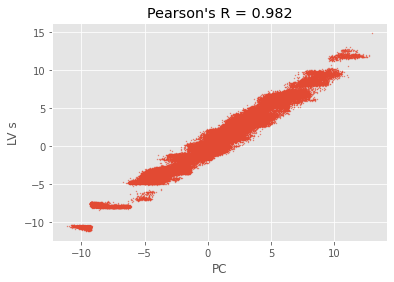

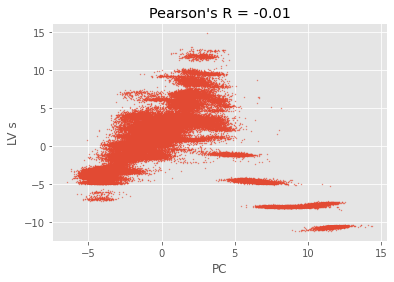

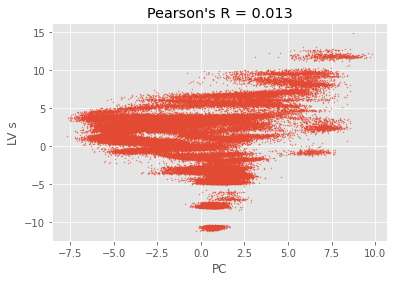

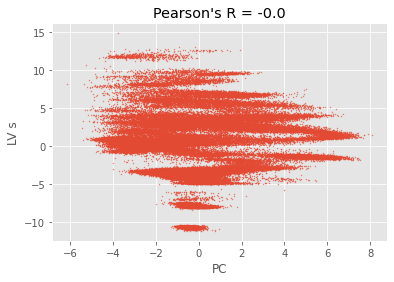

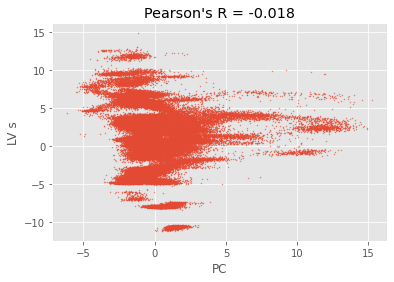

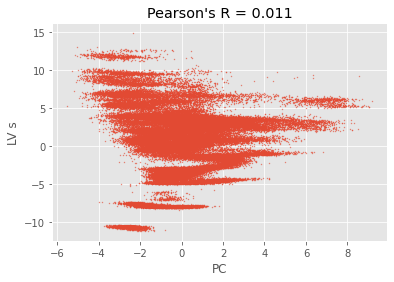

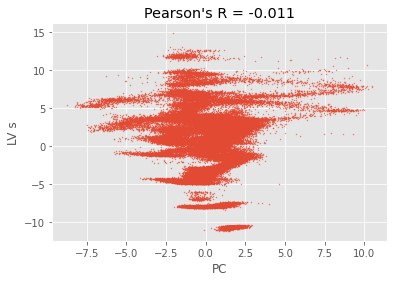

In [28]:
d=7
for i in range(d):
    x_latent = gastrulation.obs["cellcycle_pseudotime"].values
    x_pc = gastrulation.obsm["X_pca"][:,i]
    r2, pval = pearsonr(x_latent, x_pc)
    plt.scatter(x_pc, x_latent, alpha=0.5, s=1);
    plt.xlabel("PC");
    plt.ylabel("LV s");
    plt.title("Pearson's R = {r}".format(r=np.round(r2, 3)))
    plt.show()

Bonemarrow

| Dataset     | Bonemarrow|
| ----------- | ----------- |
| No of Cells | 5780        |
| No of Genes |  2030|    |
|X_Init       | PCs       |
|Time         |~12 mins        |

In [30]:
bonemarrow=sc.read_h5ad('/home/jupyter/mount/gdrive/TrainedModels/trainedBGPLVM_Bonemarrow.h5ad')

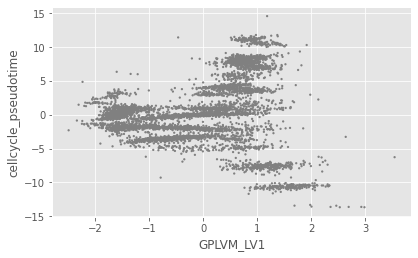

In [31]:
scatter_Plot(bonemarrow) #sanity check

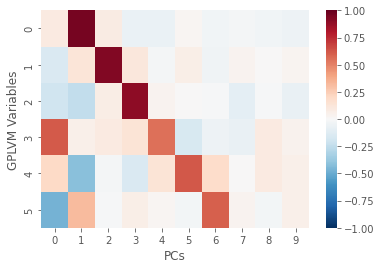

In [32]:
plot_cormap(bonemarrow, 10)

In [ ]:
bonemarrow2=sc.read_h5ad('/home/jupyter/mount/gdrive/BGPLVM_scRNA/trainedBGPLVM_Bonemarrow.h5ad')

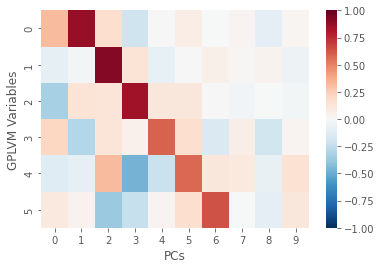

In [36]:
plot_cormap(bonemarrow2, 10)

| Dataset     | Bonemarrow|
| ----------- | ----------- |
| No of Cells | 5780        |
| No of Genes |  2030|    |
|X_Init       | random       |
|Time         |~12 mins        |

In [37]:
bonemarrow_random=sc.read_h5ad('/home/jupyter/mount/gdrive/TrainedModels/trainedBGPLVM_Bonemarrow_randomInit.h5ad')

In [38]:
bonemarrow_random2=sc.read_h5ad('/home/jupyter/mount/gdrive/BGPLVM_scRNA/trainedBGPLVM_Bonemarrow_randomInit.h5ad')

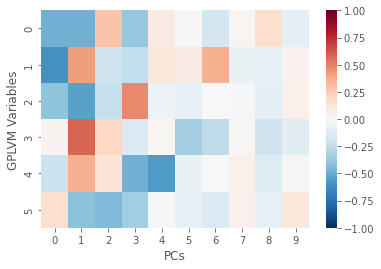

In [39]:
plot_cormap(bonemarrow_random, 10)

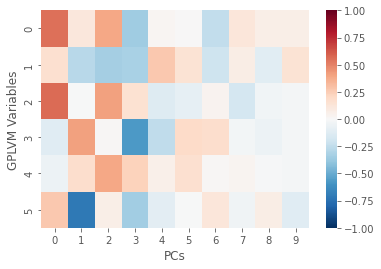

In [40]:
plot_cormap(bonemarrow_random2, 10)

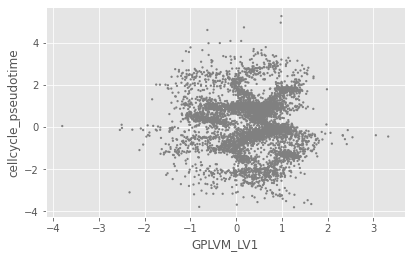

In [41]:
scatter_Plot(bonemarrow_random) #sanity check

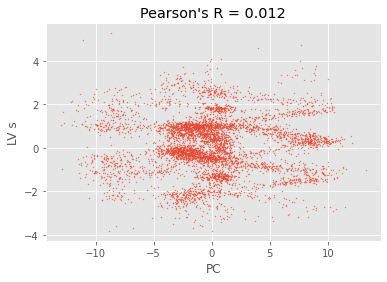

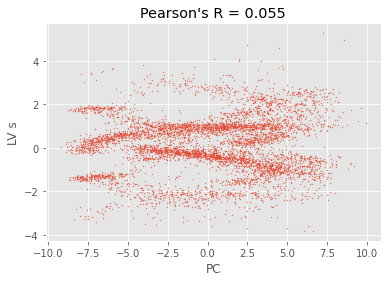

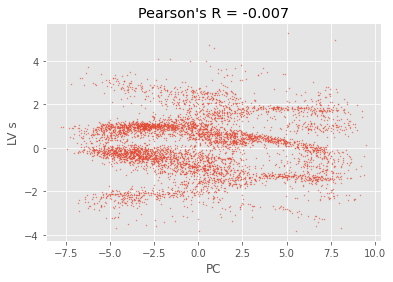

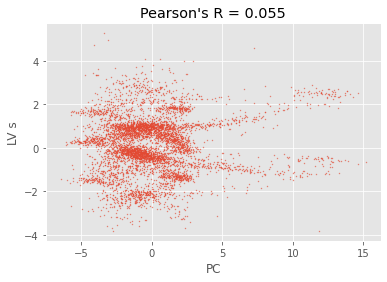

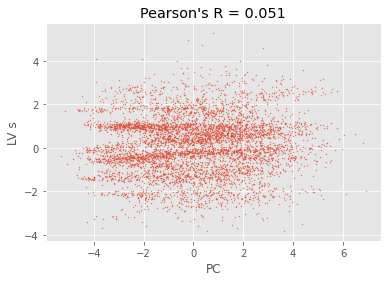

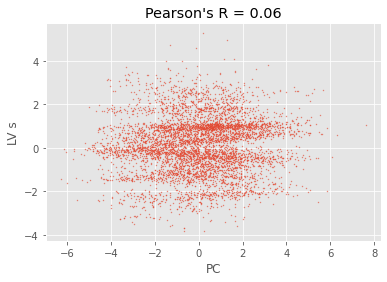

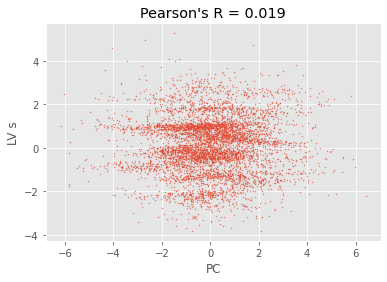

In [42]:
d=7
for i in range(d):
    x_latent = bonemarrow_random.obs["cellcycle_pseudotime"].values
    x_pc = bonemarrow_random.obsm["X_pca"][:,i]
    r2, pval = pearsonr(x_latent, x_pc)
    plt.scatter(x_pc, x_latent, alpha=0.5, s=1);
    plt.xlabel("PC");
    plt.ylabel("LV s");
    plt.title("Pearson's R = {r}".format(r=np.round(r2, 3)))
    plt.show()

Pancreas

| Dataset     |Pancreas|
| ----------- | ----------- |
| No of Cells | 3696       |
| No of Genes | 1939 |    |
|X_Init       | PCs       |
|Time         |~11 mins        |

In [43]:
pancreas=sc.read_h5ad('/home/jupyter/mount/gdrive/TrainedModels/trainedBGPLVM_Pancreas.h5ad')

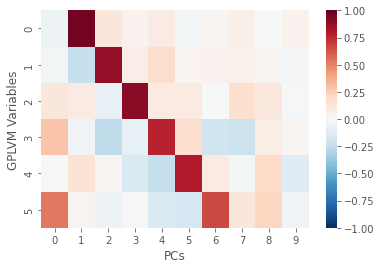

In [44]:
plot_cormap(pancreas, 10)

| Dataset     |Pancreas|
| ----------- | ----------- |
| No of Cells | 3696       |
| No of Genes | 1939 |    |
|X_Init       | random       |
|Time         |11:38 mins        |

In [45]:
pancreas_random=sc.read_h5ad('/home/jupyter/mount/gdrive/TrainedModels/trainedBGPLVM_Pancreas_randomInit.h5ad')

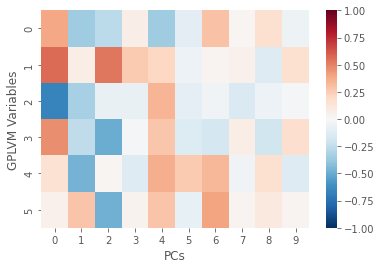

In [46]:
plot_cormap(pancreas_random, 10)

In [47]:
pancreas_random2=sc.read_h5ad('/home/jupyter/mount/gdrive/rotation1/trainedBGPLVM_Pancreas_randomInit.h5ad')

In [48]:
pancreas2=sc.read_h5ad('/home/jupyter/mount/gdrive/rotation1/trainedBGPLVM_Pancreas.h5ad')

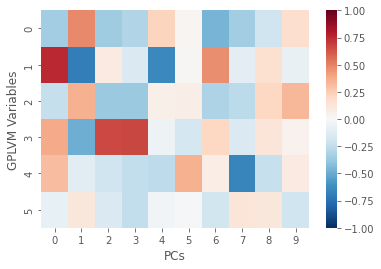

In [49]:
plot_cormap(pancreas_random2, 10)

iPSC

| Dataset     |iPSC|
| ----------- | ----------- |
| No of Cells |    22188    |
| No of Genes | 1404 |    |
|X_Init       | PCs       |
|Time         |~8:50 mins        |

In [50]:
iPSC=sc.read_h5ad('/home/jupyter/mount/gdrive/TrainedModels/trainedBGPLVM_iPSC.h5ad')

In [51]:
iPSC

AnnData object with n_obs × n_vars = 22188 × 1404
    obs: 'nfrag', 'ngene', 'donor', 'mt', 'ercc', 'plate', 'cellcycle_pseudotime'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'likelihood_state_dict', 'model_state_dict', 'pca'
    obsm: 'X_BGPLVM_latent', 'X_init', 'X_pca'
    varm: 'PCs'

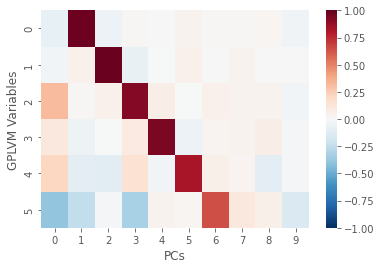

In [52]:
plot_cormap(iPSC, 10)

In [10]:
iPSC_New=sc.read_h5ad('/home/jupyter/mount/gdrive/BGPLVM_scRNA/trained_iPSC.h5ad')

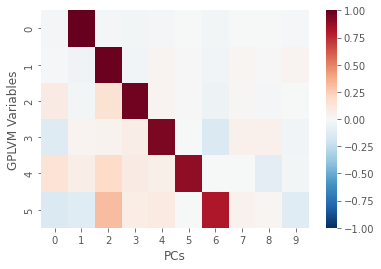

In [11]:
plot_cormap(iPSC_New, 10)

In [ ]:
plot_cormap(iPSC_random, 10)

| Dataset     |iPSC|
| ----------- | ----------- |
| No of Cells |    22188    |
| No of Genes | 1404 |    |
|X_Init       | random      |
|Time         |~8:50 mins        |

In [54]:
iPSC_random=sc.read_h5ad('/home/jupyter/mount/gdrive/TrainedModels/trainedBGPLVM_iPSC_random.h5ad')

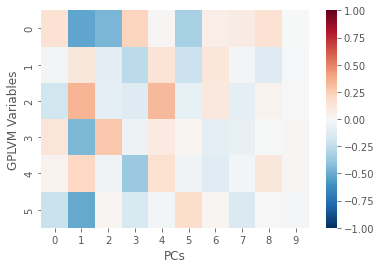

In [55]:
plot_cormap(iPSC_random, 10)

Forebrain

In [56]:
Forebrain=sc.read_h5ad('/home/jupyter/mount/gdrive/TrainedModels/trainedBGPLVM_Forebrain.h5ad')

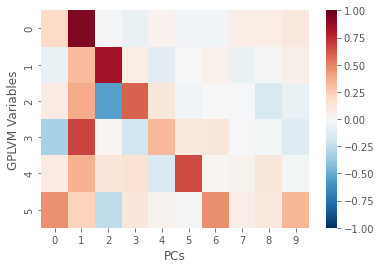

In [57]:
plot_cormap(Forebrain, 10)

In [58]:
Forebrain_random=sc.read_h5ad('/home/jupyter/mount/gdrive/TrainedModels/trainedBGPLVM_Forebrain_randomInit.h5ad')

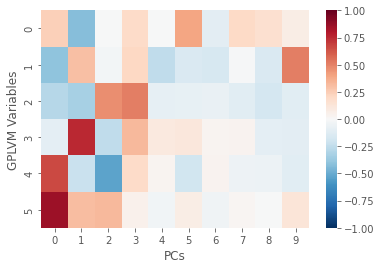

In [59]:
plot_cormap(Forebrain_random, 10)

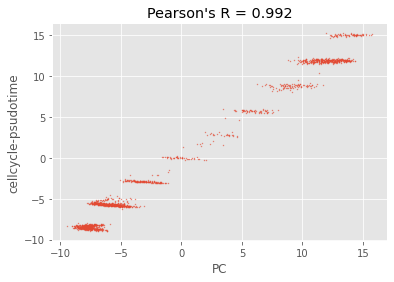

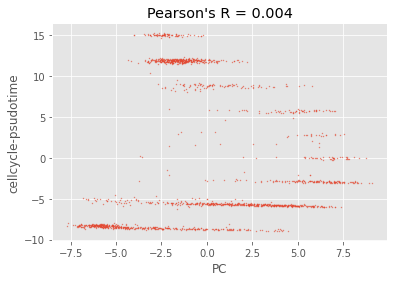

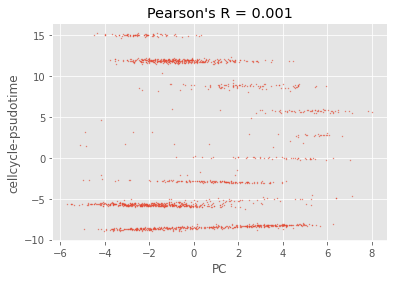

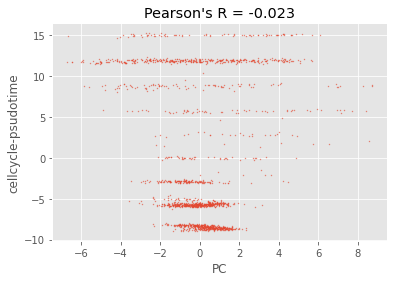

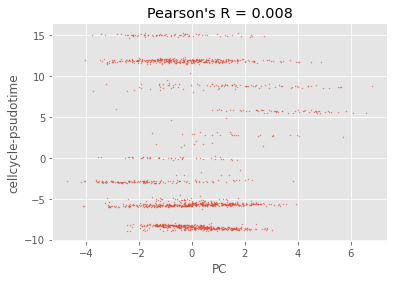

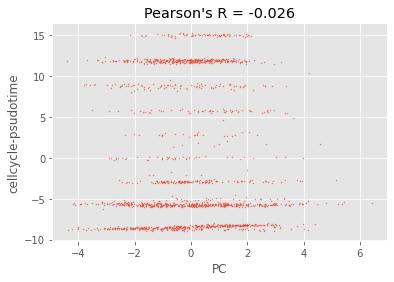

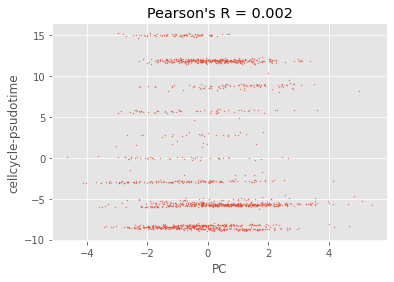

In [68]:
d=7
for i in range(d):
    x_latent = Forebrain.obs["cellcycle_pseudotime"].values
    x_pc = Forebrain.obsm["X_pca"][:,i]
    r2, pval = pearsonr(x_latent, x_pc)
    plt.scatter(x_pc, x_latent, alpha=0.5, s=1);
    plt.xlabel("PC");
    plt.ylabel("cellcycle-psudotime");
    plt.title("Pearson's R = {r}".format(r=np.round(r2, 3)))
    plt.show()

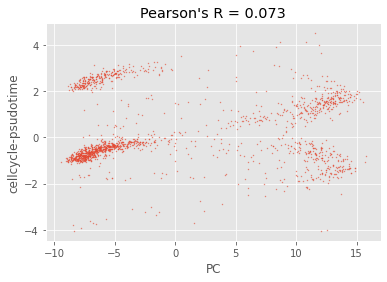

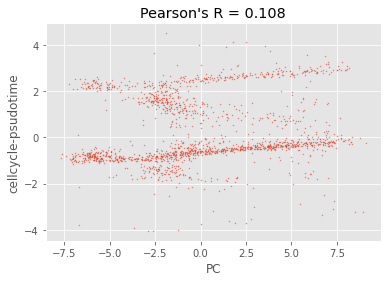

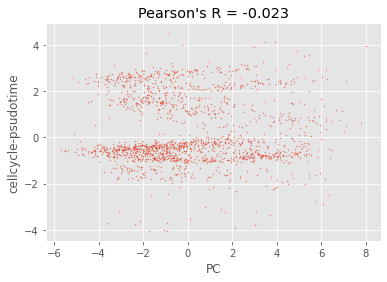

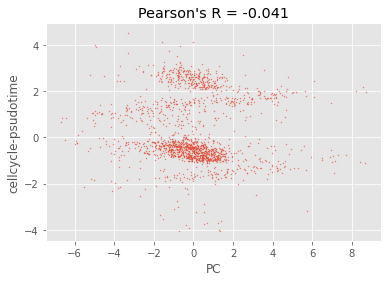

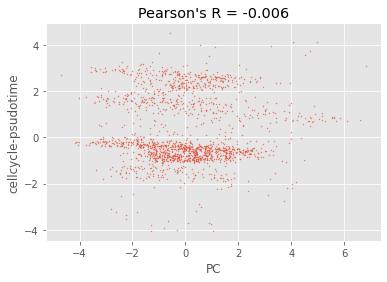

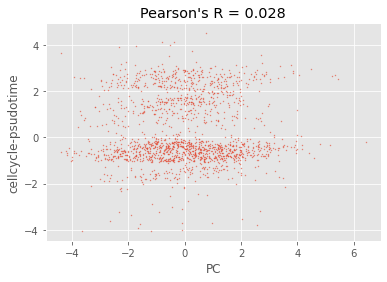

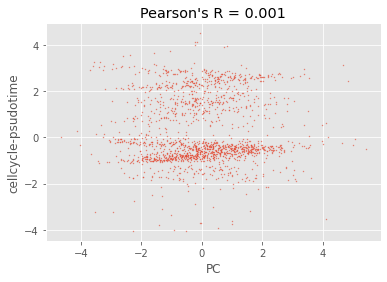

In [69]:
d=7
for i in range(d):
    x_latent = Forebrain_random.obs["cellcycle_pseudotime"].values
    x_pc = Forebrain_random.obsm["X_pca"][:,i]
    r2, pval = pearsonr(x_latent, x_pc)
    plt.scatter(x_pc, x_latent, alpha=0.5, s=1);
    plt.xlabel("PC");
    plt.ylabel("cellcycle-psudotime");
    plt.title("Pearson's R = {r}".format(r=np.round(r2, 3)))
    plt.show()

PBMC

| Dataset     |iPSC|
| ----------- | ----------- |
| No of Cells |    65877  |
| No of Genes | 1721    |
|X_Init       | PCs     |
|Time         |~10 mins        |

In [3]:
PBMC=sc.read_h5ad('/home/jupyter/GPLVM_Shaista/TrainedModels/pbmc10k_pca.h5ad')

In [5]:
PBMC

AnnData object with n_obs × n_vars = 12016 × 3954
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'cellcycle_pseudotime'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'likelihood_state_dict', 'model_state_dict', 'pca'
    obsm: 'X_BGPLVM_latent', 'X_pca', 'X_ref.spca', 'X_ref.umap'
    varm: 'PCs'

In [4]:
plot_cormap(PBMC, 10)

NameError: name 'plot_cormap' is not defined

In [72]:
PBMC_random=sc.read_h5ad('/home/jupyter/mount/gdrive/TrainedModels/trainedBGPLVM_pbmc_randomInit.h5ad')

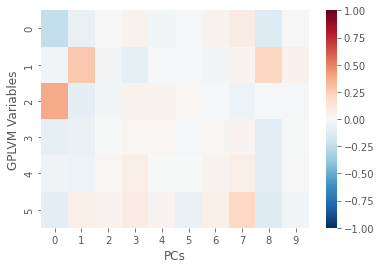

In [73]:
plot_cormap(PBMC_random, 10)

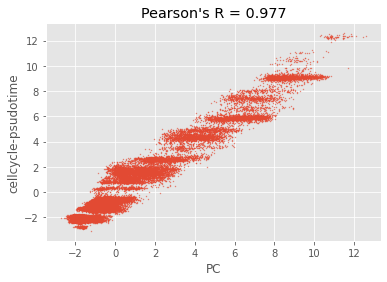

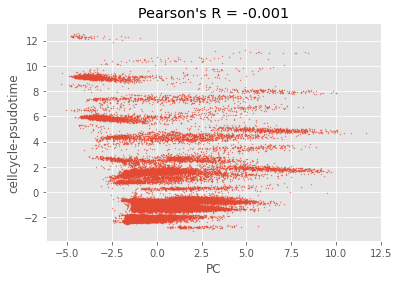

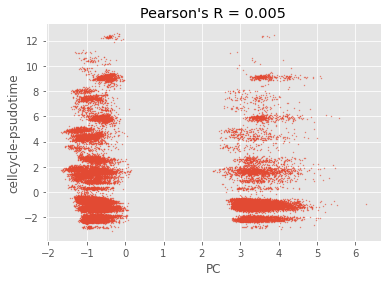

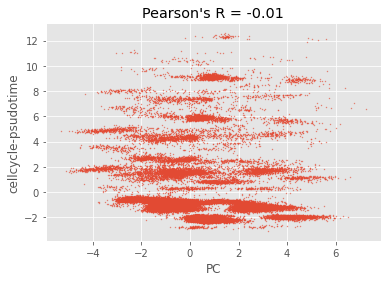

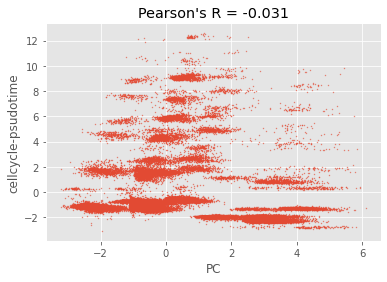

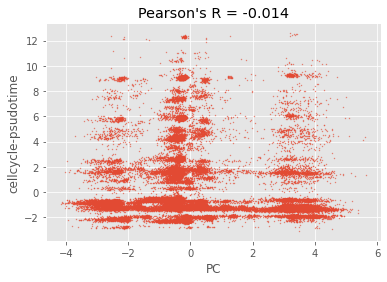

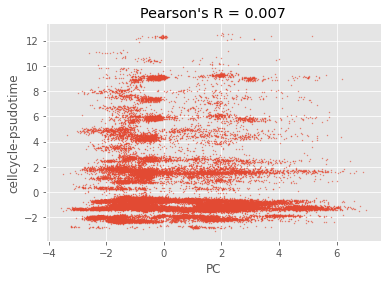

In [76]:
d=7
for i in range(d):
    x_latent = PBMC.obs["cellcycle_pseudotime"].values
    x_pc = PBMC.obsm["X_pca"][:,i]
    r2, pval = pearsonr(x_latent, x_pc)
    plt.scatter(x_pc, x_latent, alpha=0.5, s=1);
    plt.xlabel("PC");
    plt.ylabel("cellcycle-psudotime");
    plt.title("Pearson's R = {r}".format(r=np.round(r2, 3)))
    plt.show()

In [80]:
PBMC

AnnData object with n_obs × n_vars = 65877 × 1721
    obs: 'celltype', 'cellcycle_pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'likelihood_state_dict', 'model_state_dict', 'pca'
    obsm: 'X_BGPLVM_latent', 'X_pca', 'X_tsne'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'

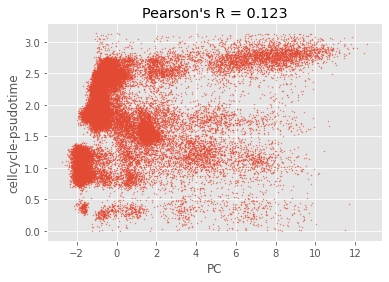

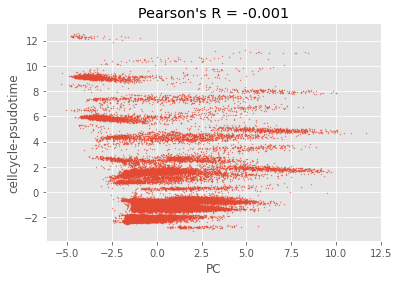

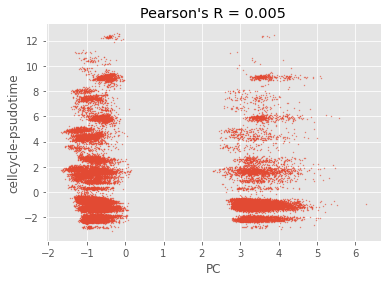

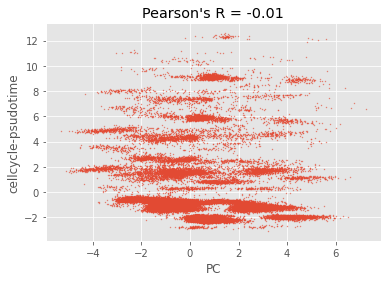

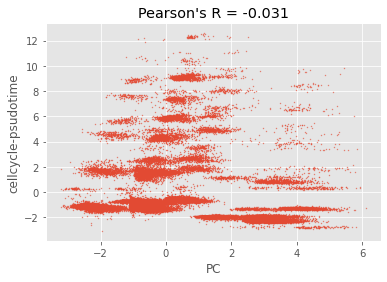

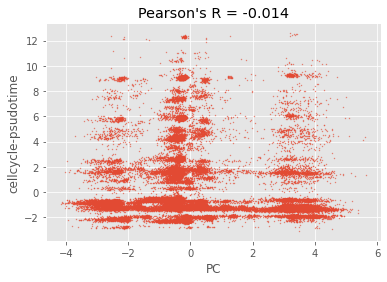

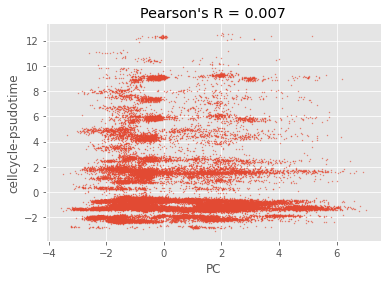

In [77]:
d=7
for i in range(d):
    x_latent = PBMC.obs["cellcycle_pseudotime"].values
    if i==0:
        x_latent = x_latent % np.pi
    x_pc = PBMC.obsm["X_pca"][:,i]
    r2, pval = pearsonr(x_latent, x_pc)
    plt.scatter(x_pc, x_latent, alpha=0.5, s=1);
    plt.xlabel("PC");
    plt.ylabel("cellcycle-psudotime");
    plt.title("Pearson's R = {r}".format(r=np.round(r2, 3)))
    plt.show()

In [79]:
np.sin(9 - 0)**2

0.16984164587795994

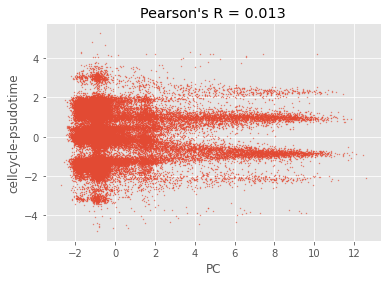

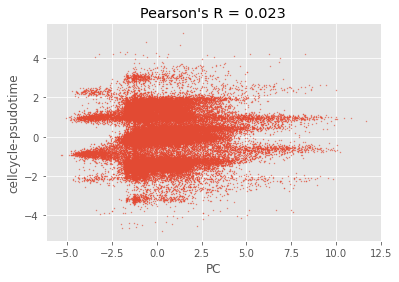

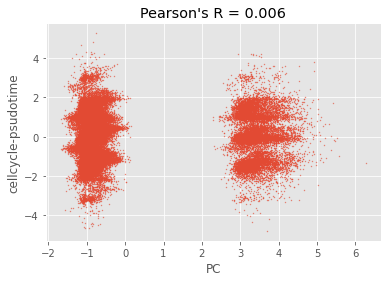

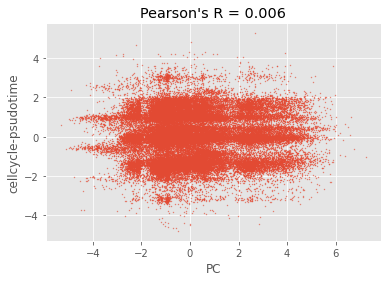

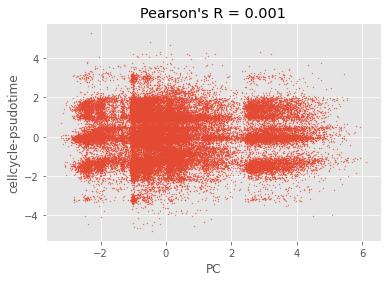

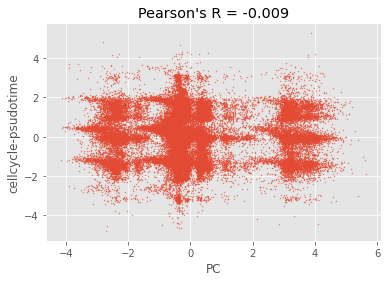

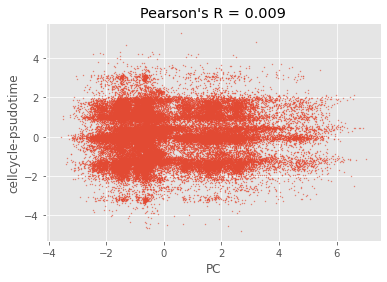

In [75]:
d=7
for i in range(d):
    x_latent = PBMC_random.obs["cellcycle_pseudotime"].values
    x_pc = PBMC_random.obsm["X_pca"][:,i]
    r2, pval = pearsonr(x_latent, x_pc)
    plt.scatter(x_pc, x_latent, alpha=0.5, s=1);
    plt.xlabel("PC");
    plt.ylabel("cellcycle-psudotime");
    plt.title("Pearson's R = {r}".format(r=np.round(r2, 3)))
    plt.show()